In [1]:
# Starting point: revno 4b5375ceb2859e6a3baacd478241191814974a1b

In [1]:
import torch
from math import pi,sqrt,log,e,exp
from time import time
from matplotlib import pyplot
import numpy as np
from matplotlib import pyplot as plt
from tqdm.autonotebook import tqdm
dtype = torch.float
device = torch.device("cuda:1")

from src.models.flows.coupling_cells.real_nvp import RealNVP
from src.models.flows.sampling import FactorizedFlowPrior
from src.models.flows.analytic_flows.element_wise import AnalyticSigmoid

In [2]:
prior_mu =  torch.tensor(0.).to(device)
prior_sig =  torch.tensor(1.2).to(device)
prior = torch.distributions.normal.Normal(prior_mu,prior_sig)

sampler = FactorizedFlowPrior(d=2,prior_1d=prior)

In [3]:
def mem():
    print(torch.cuda.memory_allocated(device=device))

In [4]:
nvp = RealNVP(d=2,
              mask=[True,False],
              d_hidden=10,
              n_hidden=5,).to(device)

sig = AnalyticSigmoid(d=2)
mem()

8192


In [5]:
nvp = RealNVP(d=2,
              mask=[True,False],
              d_hidden=10,
              n_hidden=5,).to(device)
mem()
nvp = RealNVP(d=2,
              mask=[True,False],
              d_hidden=10,
              n_hidden=5,).to(device)
mem()

8192
8192


In [7]:
def f(x):
    return torch.exp(- torch.sum(x**2,(-1,) ))

711841280
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712
3251712


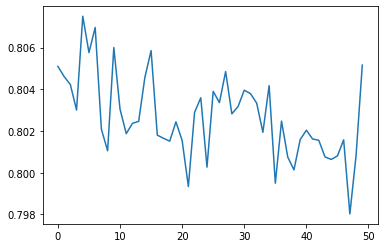

0.8051618337631226


In [8]:
nvp1 = RealNVP(d=2,
              mask=[True,False],
              d_hidden=20,
              n_hidden=10,).to(device)
nvp2 = RealNVP(d=2,
              mask=[False,True],
              d_hidden=20,
              n_hidden=10,).to(device)
nvp3 = RealNVP(d=2,
              mask=[True,False],
              d_hidden=20,
              n_hidden=10,).to(device)
nvp4 = RealNVP(d=2,
              mask=[False,True],
              d_hidden=20,
              n_hidden=10,).to(device)

optim = torch.optim.Adam(list(nvp1.parameters())+list(nvp2.parameters())+list(nvp3.parameters())+list(nvp4.parameters()),lr=1.e-5)

batch_size=100000
Ls=[]
for i in range(1000):
    mem()
    optim.zero_grad()
    x=sampler(batch_size)
    x=nvp1(x)
    x=nvp2(x)
    x=nvp3(x)
    x=nvp4(x)
    z=sig(x)
    lj=-(z[:,-1])
    L=torch.mean(-torch.log(f(z[:,:-1]))+lj)
    if i>11 and L.detach().cpu().item() > np.mean(Ls[-10:])+3*np.std(Ls[-10:]):
        Ls.append(L.detach().cpu().item())
        break
    Ls.append(L.detach().cpu().item())
    L.backward()
    optim.step()
    
plt.plot(Ls)
plt.show()
print(Ls[-1])

712352768
454656
454656
454656
454656
454656
454656
454656
454656
454656


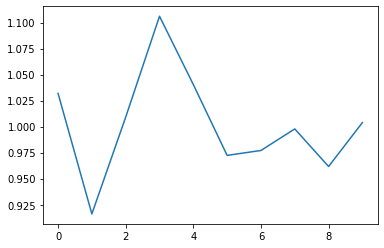

1.0039106607437134


In [9]:
nvp1 = RealNVP(d=2,
              mask=[True,False],
              d_hidden=20,
              n_hidden=10,).to(device)
nvp2 = RealNVP(d=2,
              mask=[False,True],
              d_hidden=20,
              n_hidden=10,).to(device)
nvp3 = RealNVP(d=2,
              mask=[True,False],
              d_hidden=20,
              n_hidden=10,).to(device)
nvp4 = RealNVP(d=2,
              mask=[False,True],
              d_hidden=20,
              n_hidden=10,).to(device)

optim = torch.optim.Adam(list(nvp1.parameters())+list(nvp2.parameters())+list(nvp3.parameters())+list(nvp4.parameters()),lr=1.e-5)

batch_size=100
Ls=[]
for i in range(10):
    mem()
    optim.zero_grad()
    x=sampler(batch_size)
    x=nvp1(x)
    x=nvp2(x)
    x=nvp3(x)
    x=nvp4(x)
    z=sig(x)
    lj=-(z[:,-1])
    L=torch.mean(-torch.log(f(z[:,:-1]))+lj)
    if i>11 and L.detach().cpu().item() > np.mean(Ls[-10:])+3*np.std(Ls[-10:]):
        Ls.append(L.detach().cpu().item())
        break
    Ls.append(L.detach().cpu().item())
    L.backward()
    optim.step()
    
plt.plot(Ls)
plt.show()
print(Ls[-1])

Theres no memory leak but looking at the first report: when reallocating existing variables, we have more mem. Evaluating rhs before overwriting lhs. Kinda dumb